# Лабораторна робота 4 "CNN"

## Соколенко №12

Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:
***
Завдання :
1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101.
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.
Класи : 
#### i1=12-1=11 , i2=12+29=41 , i3=12+59=71
#### bruschetta  french_onion_soup paella
3. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
4. Результати викласти у репозиторії GitHub (папка Lab4).
5. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

In [5]:
import pathlib
import numpy as np
import os
data_dir = pathlib.Path("train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['bruschetta' 'french_onion_soup' 'paella']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


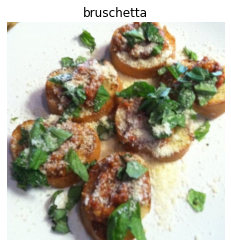

In [8]:
img = view_random_image(target_dir="train/",
                        target_class="bruschetta")

Image shape: (512, 512, 3)


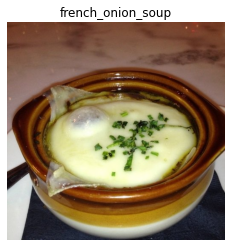

In [10]:
img = view_random_image(target_dir="train/",
                        target_class="french_onion_soup")

Image shape: (512, 382, 3)


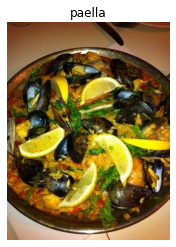

In [11]:
img = view_random_image(target_dir="train/",
                        target_class="paella")

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "train/"
test_dir = "test/"

In [13]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [14]:


# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 14s 2s/step - loss: 1.1264 - accuracy: 0.3200 - val_loss: 1.0895 - val_accuracy: 0.3973
Epoch 2/5
8/8 [==============================] - 14s 2s/step - loss: 1.0836 - accuracy: 0.4489 - val_loss: 1.0916 - val_accuracy: 0.3880
Epoch 3/5
8/8 [==============================] - 15s 2s/step - loss: 1.0136 - accuracy: 0.4889 - val_loss: 1.0573 - val_accuracy: 0.4307
Epoch 4/5
8/8 [==============================] - 15s 2s/step - loss: 0.9760 - accuracy: 0.5600 - val_loss: 1.0035 - val_accuracy: 0.5000
Epoch 5/5
8/8 [==============================] - 16s 2s/step - loss: 0.9021 - accuracy: 0.6356 - val_loss: 0.9850 - val_accuracy: 0.5373


In [15]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

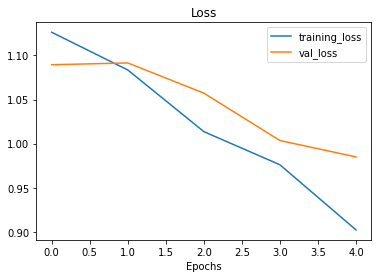

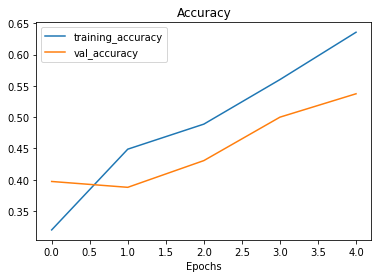

In [16]:
plot_loss_curves(history_1)

In [17]:
pred = model_1.predict(valid_data).argmax(axis=1)
len(pred)

750

In [18]:
len(valid_data), len(valid_data[0][-1])

(24, 32)

In [19]:
len(train_data), len(train_data[0][-1])

(8, 32)

?????

In [20]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "test/"
test_dir = "train/"

In [21]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [22]:
# Create a CNN model
model_2 = model_1

# Compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
24/24 [==============================] - 28s 1s/step - loss: 1.0171 - accuracy: 0.5027 - val_loss: 0.8196 - val_accuracy: 0.6844
Epoch 2/5
24/24 [==============================] - 25s 1s/step - loss: 0.8715 - accuracy: 0.5987 - val_loss: 0.7501 - val_accuracy: 0.6622
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.7188 - accuracy: 0.7120 - val_loss: 0.6776 - val_accuracy: 0.7244
Epoch 4/5
24/24 [==============================] - 25s 1s/step - loss: 0.5886 - accuracy: 0.7773 - val_loss: 0.6802 - val_accuracy: 0.7200
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.4596 - accuracy: 0.8173 - val_loss: 0.7404 - val_accuracy: 0.6400


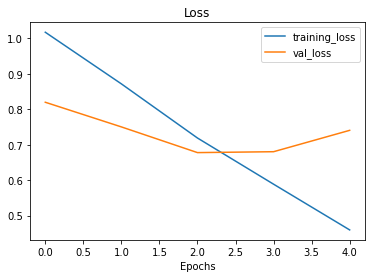

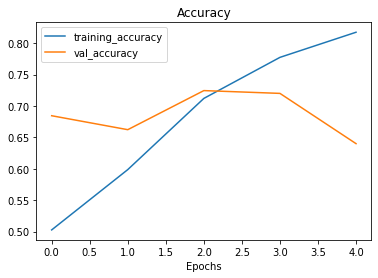

In [23]:
plot_loss_curves(history_2)

In [24]:
pred2 = model_1.predict(valid_data).argmax(axis=1)
len(pred2)

225

In [25]:
true_y = []
for batch in range(len(valid_data)):
    true_y += list(valid_data[batch][-1].argmax(axis=1))
len(true_y)

225

In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [27]:
conf_matrix = pd.DataFrame(confusion_matrix(y_pred=pred2, y_true=true_y), 
                            index=class_names, 
                            columns=class_names)
conf_matrix

,bruschetta,french_onion_soup,paella
bruschetta,20,39,16
french_onion_soup,17,35,23
paella,15,42,18


In [28]:
def load_and_prep_image(target_dir, target_class, img_shape=224):
  # Read in target file (an image)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  img = tf.convert_to_tensor(img)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  # img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
def pred_and_plot(model, target_dir, target_class, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(target_dir, target_class)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

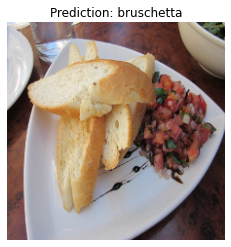

In [29]:
pred_and_plot(model_2, 'train/', 'bruschetta', class_names)

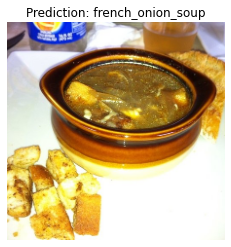

In [56]:
pred_and_plot(model_2, 'train/', 'french_onion_soup', class_names)

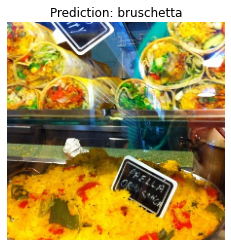

In [57]:
pred_and_plot(model_2, 'train/', 'paella', class_names)